In [51]:
import matplotlib.pyplot as plt
import numpy as np
import os
import slsim
import speclite
from astropy.cosmology import FlatLambdaCDM
from astropy.units import Quantity
from slsim.Observations.roman_speclite import configure_roman_filters
from slsim.Observations.roman_speclite import filter_names
from slsim.lens_pop import LensPop
from tqdm import tqdm

from mejiro.helpers import survey_sim

In [52]:
# path = os.path.dirname(slsim.__file__)
# module_path, _ = os.path.split(path)
# skypy_config = os.path.join(module_path, "data/SkyPy/roman-like.yml")

import mejiro

module_path = os.path.dirname(mejiro.__file__)
skypy_config = os.path.join(module_path, 'data', 'roman_hlwas.yml')

print(f'Loaded SkyPy configuration file {skypy_config}')

Loaded SkyPy configuration file /nfshome/bwedig/mejiro/mejiro/data/roman_hlwas.yml


In [53]:
configure_roman_filters()

roman_filters = filter_names()

_ = speclite.filters.load_filters(
    roman_filters[0],
    roman_filters[1],
    roman_filters[2],
    roman_filters[3],
    roman_filters[4],
    roman_filters[5],
    roman_filters[6],
    roman_filters[7],
)

In [54]:
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
sky_area = Quantity(value=1., unit="deg2")

kwargs_deflector_cut = {"band": "F062", "band_max": 24, "z_min": 0.01, "z_max": 3.0}
kwargs_source_cut = {"band": "F062", "band_max": 25, "z_min": 0.01, "z_max": 5.0}

lens_pop = LensPop(
    deflector_type="all-galaxies",
    source_type="galaxies",
    kwargs_deflector_cut=kwargs_deflector_cut,
    kwargs_source_cut=kwargs_source_cut,
    kwargs_mass2light=None,
    skypy_config=skypy_config,
    sky_area=sky_area,
    cosmo=cosmo,
)

In [55]:
kwargs_lens_cut = {
    "min_image_separation": 0.1,
    "max_image_separation": 10,
    "mag_arc_limit": {"F158": 25, "F106": 25, "F062": 25},
}

lens_population = lens_pop.draw_population(kwargs_lens_cuts=kwargs_lens_cut)

In [56]:
deflector_mags, source_lensed_mags, source_unlensed_mags = [], [], []

for gg_lens in lens_population:
    deflector_mag = gg_lens.deflector_magnitude(band=kwargs_deflector_cut['band'])
    source_lensed_mag = gg_lens.extended_source_magnitude(band=kwargs_deflector_cut['band'], lensed=True)
    source_unlensed_mag = gg_lens.extended_source_magnitude(band=kwargs_deflector_cut['band'], lensed=False)

    deflector_mags.append(deflector_mag)
    source_lensed_mags.append(source_lensed_mag)
    source_unlensed_mags.append(source_unlensed_mag)

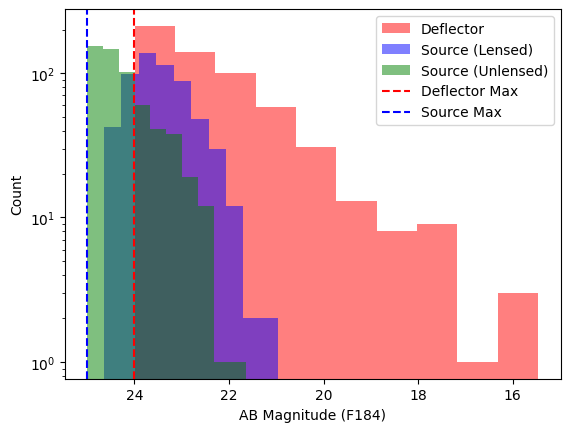

In [57]:
plt.hist(deflector_mags, label='Deflector', alpha=0.5, color='r')
plt.hist(source_lensed_mags, label='Source (Lensed)', alpha=0.5, color='b')
plt.hist(source_unlensed_mags, label='Source (Unlensed)', alpha=0.5, color='g')
plt.xlabel('AB Magnitude (F184)')
plt.ylabel('Count')
plt.yscale('log')
plt.axvline(kwargs_deflector_cut['band_max'], color='r', linestyle='--', label='Deflector Max')
plt.axvline(kwargs_source_cut['band_max'], color='b', linestyle='--', label='Source Max')
plt.gca().invert_xaxis()
plt.legend()
plt.show()